In [1]:
%pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as sql
from matplotlib.pyplot import figure

# Projeto do D2TEC

## Equipe
<p>Evandro Henrique Couto de Paula</p>
<p>Jessica Oliveira</p>

## Descrição do projeto

<p>O trabalho trata de um banco de dados sobre jogos virtuais lançados desde os anos 80 até 2016.</p>
<p>O banco guarda dados de identificação dos jogos, dados de avaliação da crítica especializada e usuários, quando este existe para o game em questão, também a número das vendas nas diferentes regiões do mundo.</p>

## Modelo ER

![title](modelo-er.png)

## Buscas
### Conexão ao banco de dados

In [3]:
# db_connection = sql.connect(host='pos-d2tec.c0ntonsjesil.us-east-1.rds.amazonaws.com', database='games', user='root', password='', port=3306)
db_connection = sql.connect(host='localhost', database='games', user='root', password='123456', port=3303)
db_cursor = db_connection.cursor()

#### Qual publisher publicou mais jogos?
<ul>
    <li>Nesta consulta a clasula COUNT realiza a contagem de quantos jogos a produtora publicou</li>
    <li>O JOIN é utilizado para carregar as informações da tabela publisher, e para realizar o agrupamento dos valores na tabela dos games é utilizada a clausula GROUP BY e ORDER é utilizado para ordernar a lista em ordem decrescente.</li>
    <li>O LIMIT é utilizado apenas para exibir apenas uma pequena amostra da tabela.</li>
</ul>

In [4]:
pub_query = ("SELECT  p.nome, COUNT(p.id) as jogos_publicados FROM game g INNER JOIN publisher p ON p.id = g.publisher GROUP BY p.nome ORDER BY jogos_publicados DESC LIMIT 10;")
db_cursor.execute(pub_query)
for result in db_cursor:
     print("A poublisher {} publicou {} jogos".format(result[0], result[1]))


A poublisher Electronic Arts publicou 1356 jogos
A poublisher Activision publicou 985 jogos
A poublisher Namco Bandai Games publicou 938 jogos
A poublisher Ubisoft publicou 933 jogos
A poublisher Konami Digital Entertainment publicou 834 jogos
A poublisher THQ publicou 715 jogos
A poublisher Nintendo publicou 704 jogos
A poublisher Sony Computer Entertainment publicou 686 jogos
A poublisher Sega publicou 637 jogos
A poublisher Take-Two Interactive publicou 422 jogos


#### O ano em que mais jogos foram produzidos?
<ul>
    <li>Nesta consulta a clasula COUNT realiza a contagem de jogos publicados no ano</li>
    <li>O GROUP BY e ORDER é utilizado para ordernar a lista em ordem decrescente.</li>
    <li>O LIMIT é utilizado apenas para exibir apenas uma pequena amostra da tabela.</li>
</ul>

In [5]:
pub_query = ("SELECT g.ano_lancamento, count(g.ano_lancamento) as lancamentos FROM game g GROUP BY g.ano_lancamento ORDER BY lancamentos DESC LIMIT 10")
db_cursor.execute(pub_query)
for result in db_cursor:
    print("ANO DE LANÇAMENTO: {} QUANTIDADE DE GAMES PRODUZIDOS: {}".format(result[0], result[1]))



ANO DE LANÇAMENTO: 2009 QUANTIDADE DE GAMES PRODUZIDOS: 1426
ANO DE LANÇAMENTO: 2008 QUANTIDADE DE GAMES PRODUZIDOS: 1425
ANO DE LANÇAMENTO: 2010 QUANTIDADE DE GAMES PRODUZIDOS: 1253
ANO DE LANÇAMENTO: 2007 QUANTIDADE DE GAMES PRODUZIDOS: 1197
ANO DE LANÇAMENTO: 2011 QUANTIDADE DE GAMES PRODUZIDOS: 1136
ANO DE LANÇAMENTO: 2006 QUANTIDADE DE GAMES PRODUZIDOS: 1003
ANO DE LANÇAMENTO: 2005 QUANTIDADE DE GAMES PRODUZIDOS: 938
ANO DE LANÇAMENTO: 2002 QUANTIDADE DE GAMES PRODUZIDOS: 829
ANO DE LANÇAMENTO: 2003 QUANTIDADE DE GAMES PRODUZIDOS: 774
ANO DE LANÇAMENTO: 2004 QUANTIDADE DE GAMES PRODUZIDOS: 762


#### QUAL O GENERO DOS JOGOS MAIS VENDIDOS?
<ul>
    <li>Nesta consulta é realizada u subconsulta onde os dados coletados são os dados dos jogos mais vendidos no mundo e esse resultado é unido ao genero para que possamos exibir qual o genero dos jogos mais vendidos no mundo</li>
</ul>

In [6]:
pub_query = ("SELECT t.nome, g.nome FROM genero g INNER JOIN (SELECT g.nome, g.genero FROM game g INNER JOIN vendas_global vg ON vg.game = g.id ORDER BY vg.quantidade DESC LIMIT 10) as t ON t.genero = g.id;")
db_cursor.execute(pub_query)
for result in db_cursor:
    print("JOGO: {} GENERO: {}".format(result[0], result[1]))


JOGO: Wii Sports GENERO: Sports
JOGO: Super Mario Bros. GENERO: Platform
JOGO: Mario Kart Wii GENERO: Racing
JOGO: Wii Sports Resort GENERO: Sports
JOGO: Pokemon Red/Pokemon Blue GENERO: Role-Playing
JOGO: Tetris GENERO: Puzzle
JOGO: New Super Mario Bros. GENERO: Platform
JOGO: Wii Play GENERO: Misc
JOGO: New Super Mario Bros. Wii GENERO: Platform
JOGO: Duck Hunt GENERO: Shooter


#### QUAL O GENERO DE JOGOS MAIS PRODUZIDO?
<ul>
    <li>Os JOINS foram utilizados para enriquecer os dados na consulta</li>
    <li>O COUNT é utilizado para contar quantas linhas da pesquisa são compatíveis com a condição da busca. Como a agregação limita a uma lista curta dee resultados não foi usada a clusula where</li>
</ul>

In [7]:
pub_query = ("SELECT gd.nome, count(genero) as quantidade_produzida FROM game g LEFT JOIN genero gd ON gd.id = g.genero GROUP BY g.genero ORDER BY quantidade_produzida DESC;")
db_cursor.execute(pub_query)
for result in db_cursor:
    print("Genero: {}, Quantidade de games produzidos: {}". format(result[0], result[1]))


Genero: Action, Quantidade de games produzidos: 3367
Genero: Sports, Quantidade de games produzidos: 2348
Genero: Misc, Quantidade de games produzidos: 1743
Genero: Role-Playing, Quantidade de games produzidos: 1499
Genero: Shooter, Quantidade de games produzidos: 1323
Genero: Adventure, Quantidade de games produzidos: 1301
Genero: Racing, Quantidade de games produzidos: 1249
Genero: Platform, Quantidade de games produzidos: 888
Genero: Simulation, Quantidade de games produzidos: 874
Genero: Fighting, Quantidade de games produzidos: 849
Genero: Strategy, Quantidade de games produzidos: 683
Genero: Puzzle, Quantidade de games produzidos: 580
Genero: N/D, Quantidade de games produzidos: 2


#### QUAL OS JOGOS MAIS VENDIDOS NOS EUA?
<ul>
    <li>Nesta consulta a exibição se trata dos jogos mais vendidos nos EUA, o maior mercado ocidental de jogos</li>
</ul>

In [8]:
pub_query = ("SELECT g.nome, g.ano_lancamento, vu.quantidade FROM game g INNER JOIN vendas_eua vu ON vu.game = g.id ORDER BY vu.quantidade DESC LIMIT 10;")
db_cursor.execute(pub_query)
for result in db_cursor:
    print("O jogo {} lançado em {} vendeu {} de cópias". format(result[0], result[1], result[2]))


O jogo Wii Sports lançado em 2006 vendeu 41360000 de cópias
O jogo Super Mario Bros. lançado em 1985 vendeu 29080000 de cópias
O jogo Duck Hunt lançado em 1984 vendeu 26930000 de cópias
O jogo Tetris lançado em 1989 vendeu 23200000 de cópias
O jogo Mario Kart Wii lançado em 2008 vendeu 15680000 de cópias
O jogo Wii Sports Resort lançado em 2009 vendeu 15610000 de cópias
O jogo Kinect Adventures! lançado em 2010 vendeu 15000000 de cópias
O jogo New Super Mario Bros. Wii lançado em 2009 vendeu 14440000 de cópias
O jogo Wii Play lançado em 2006 vendeu 13960000 de cópias
O jogo Super Mario World lançado em 1990 vendeu 12780000 de cópias


#### QUAL OS JOGOS MAIS VENDIDOS NO JAPÃO QUE NÃO SÃO PUBLICADOS PELA NINTENDO?
<p>A nintendo se trata da mais famosa publisher de jogos do japão.</p>
<ul>
    <li>Nesta consulta o NOT IN foi utilizado para excluir o elemento que foi retornado pela subconsulta</li>
</ul>

In [9]:
pub_query = ("SELECT g.nome, g.ano_lancamento, vj.quantidade FROM game g INNER JOIN vendas_japao vj ON vj.game = g.id WHERE publisher NOT IN (SELECT id FROM publisher WHERE nome = 'Nintendo' ) ORDER BY vj.quantidade DESC LIMIT 10;")
db_cursor.execute(pub_query)
for result in db_cursor:
    print("O jogo {} lançado em {} vendeu {} de cópias". format(result[0], result[1], result[2]))


O jogo Monster Hunter Freedom 3 lançado em 2010 vendeu 4870000 de cópias
O jogo Monster Hunter Freedom Unite lançado em 2008 vendeu 4130000 de cópias
O jogo Dragon Quest VII: Warriors of Eden lançado em 2000 vendeu 4100000 de cópias
O jogo Dragon Warrior III lançado em 1988 vendeu 3770000 de cópias
O jogo Final Fantasy VIII lançado em 1999 vendeu 3630000 de cópias
O jogo Dragon Quest VIII: Journey of the Cursed King lançado em 2004 vendeu 3610000 de cópias
O jogo Monster Hunter 4 lançado em 2013 vendeu 3440000 de cópias
O jogo Final Fantasy VII lançado em 1997 vendeu 3280000 de cópias
O jogo Dragon Quest VI: Maboroshi no Daichi lançado em 1995 vendeu 3190000 de cópias
O jogo Dragon Warrior IV lançado em 1990 vendeu 3030000 de cópias


### QUAL OS JOGOS MAIS VENDIDOS NOS MUNDIALMENTE?
<ul>
    <li>O JOIN na consulta visa o enriquecimento das infomações na consulta</li>
</ul>

In [10]:
pub_query = ("SELECT g.nome, g.ano_lancamento, vg.quantidade FROM game g INNER JOIN vendas_global vg ON vg.game = g.id ORDER BY vg.quantidade DESC LIMIT 10;")
db_cursor.execute(pub_query)
for result in db_cursor:
    print("O jogo {} lançado em {} vendeu {} de cópias". format(result[0], result[1], result[2]))

O jogo Wii Sports lançado em 2006 vendeu 82530000 de cópias
O jogo Super Mario Bros. lançado em 1985 vendeu 40240000 de cópias
O jogo Mario Kart Wii lançado em 2008 vendeu 35520000 de cópias
O jogo Wii Sports Resort lançado em 2009 vendeu 32770000 de cópias
O jogo Pokemon Red/Pokemon Blue lançado em 1996 vendeu 31370000 de cópias
O jogo Tetris lançado em 1989 vendeu 30260000 de cópias
O jogo New Super Mario Bros. lançado em 2006 vendeu 29800000 de cópias
O jogo Wii Play lançado em 2006 vendeu 28920000 de cópias
O jogo New Super Mario Bros. Wii lançado em 2009 vendeu 28320000 de cópias
O jogo Duck Hunt lançado em 1984 vendeu 28310000 de cópias


#### QUAL OS JOGOS MAIS BEM AVALIADOS PELOS CRÍTICOS?
<ul>
    <li>O JOIN na consulta visa o enriquecimento das infomações na consulta</li>
    <li>O ORDER BY é aplicado para que os mais bem avaliados sejam elencados no topo</li>
</ul>

In [11]:
pub_query = ("SELECT g.nome, nc.avaliacao FROM game g INNER JOIN notas_da_critica nc ON nc.game = g.id ORDER BY nc.avaliacao DESC LIMIT 10;")
db_cursor.execute(pub_query)
for result in db_cursor:
    print("O jogo {} recebeu a nota: {} da critica especializada". format(result[0], result[1]))

O jogo Grand Theft Auto IV recebeu a nota: 98 da critica especializada
O jogo Grand Theft Auto IV recebeu a nota: 98 da critica especializada
O jogo Tony Hawk's Pro Skater 2 recebeu a nota: 98 da critica especializada
O jogo SpongeBob's Boating Bash recebeu a nota: 98 da critica especializada
O jogo Grand Theft Auto V recebeu a nota: 97 da critica especializada
O jogo Grand Theft Auto V recebeu a nota: 97 da critica especializada
O jogo Grand Theft Auto III recebeu a nota: 97 da critica especializada
O jogo Grand Theft Auto V recebeu a nota: 97 da critica especializada
O jogo Super Mario Galaxy recebeu a nota: 97 da critica especializada
O jogo Super Mario Galaxy 2 recebeu a nota: 97 da critica especializada


#### QUAL OS JOGOS MAIS BEM AVALIADOS PELOS USUÁRIOS?
<ul>
    <li>O JOIN na consulta visa o enriquecimento das infomações na consulta</li>
    <li>O ORDER BY é aplicado para que os mais bem avaliados sejam elencados no topo</li>
</ul>

In [12]:
pub_query = ("SELECT g.nome, nu.avaliacao FROM game g INNER JOIN notas_dos_usuarios nu ON nu.game = g.id ORDER BY nu.avaliacao DESC LIMIT 10;")
db_cursor.execute(pub_query)
for result in db_cursor:
    print("O jogo {} recebeu a nota: {} dos usuários". format(result[0], result[1]))

O jogo Max Payne recebeu a nota: 10 dos usuários
O jogo Naruto: The Broken Bond recebeu a nota: 10 dos usuários
O jogo Capcom Classics Collection Remixed recebeu a nota: 10 dos usuários
O jogo F1 2012 recebeu a nota: 10 dos usuários
O jogo Where the Wild Things Are recebeu a nota: 10 dos usuários
O jogo Crayon Shin-Chan Shokkugan! Densetsu o Yobu Omake Daiketsusen!! recebeu a nota: 10 dos usuários
O jogo Sorcery Saga: The Curse of the Great Curry God recebeu a nota: 10 dos usuários
O jogo Juggler DS recebeu a nota: 10 dos usuários
O jogo WSC REAL 09: World Snooker Championship recebeu a nota: 10 dos usuários
O jogo New Super Mario Bros. recebeu a nota: 9 dos usuários


#### QUAL A MÉDIA DOS GENEROS MAIS BEM AVALIADOS?
<ul>
    <li>O AVG na consuta busca trazer a média das notas das critica para os jogos do genero em específico</li>
    <li>O JOIN na consulta visa o enriquecimento das infomações na consulta</li>
    <li>O ORDER BY é aplicado para que os mais bem avaliados sejam elencados no topo</li>
</ul>

In [13]:
pub_query = ("SELECT gd.nome, AVG(nc.avaliacao) media FROM game g INNER JOIN notas_da_critica nc ON nc.game = g.id INNER JOIN genero gd  ON gd.id = g.genero GROUP BY gd.nome ORDER BY media DESC LIMIT 10;")
db_cursor.execute(pub_query)
for result in db_cursor:
    print("Os jogos do genero {} tem uma média de {:.2f} da mídia especializada". format(result[0], result[1]))

Os jogos do genero Shooter tem uma média de 71.10 da mídia especializada
Os jogos do genero Platform tem uma média de 70.32 da mídia especializada
Os jogos do genero Racing tem uma média de 69.72 da mídia especializada
Os jogos do genero Sports tem uma média de 69.64 da mídia especializada
Os jogos do genero Fighting tem uma média de 69.37 da mídia especializada
Os jogos do genero Action tem uma média de 69.31 da mídia especializada
Os jogos do genero Role-Playing tem uma média de 69.15 da mídia especializada
Os jogos do genero Puzzle tem uma média de 68.33 da mídia especializada
Os jogos do genero Simulation tem uma média de 67.84 da mídia especializada
Os jogos do genero Misc tem uma média de 67.42 da mídia especializada


#### QUAL A QUANTIDADE DE JOGOS VENDIDOS MUNDIALMENTE, POR GENERO COM MÉDIAS DA CRÍTICA SUPERIORES A 73?

<ul>
    <li>A função SUM relazia a soma de todos os valores referentes a venda dos jogos de um genero específico.</li>
    <li>O GROUP BY é usado para agragar os jogos do genero.</li>
    <li>A clausula HAVING é usada para que a condição pudesse ser aplicada à função de agragação AVG</li>
</ul>

In [14]:
pub_query = ("SELECT gd.nome genero, sum(vg.quantidade) quantidade_vendida FROM genero gd  INNER JOIN game g ON g.genero = gd.id INNER JOIN notas_da_critica nc ON nc.game = g.id INNER JOIN vendas_global vg ON vg.game = g.id GROUP BY gd.id HAVING AVG(nc.avaliacao) > 73;")
db_cursor.execute(pub_query)
for result in db_cursor:
    print("Os jogos do genero {} vederam {} cópias.". format(result[0], result[1]))

Os jogos do genero Platform vederam 391390000 cópias.
Os jogos do genero Puzzle vederam 113990000 cópias.
Os jogos do genero Shooter vederam 735240000 cópias.


#### QUAL A PLATAFORMA MAIS POPULAR? 
<ul>
    <li>O COUNT foi utilizado para elencar quantos jogos foram lançados em cada plataforma.</li>
</ul>

In [15]:
pub_query = ("SELECT p.nome, count(g.plataforma) as jogo_na_plataforma FROM game g INNER JOIN plataforma p ON p.id = g.plataforma GROUP BY g.plataforma ORDER BY jogo_na_plataforma DESC;")
db_cursor.execute(pub_query)
for result in db_cursor:
    print("A plataforma {} tem {} jogos em sua biblioteca". format(result[0], result[1]))

A plataforma PS2 tem 2160 jogos em sua biblioteca
A plataforma DS tem 2147 jogos em sua biblioteca
A plataforma PS3 tem 1331 jogos em sua biblioteca
A plataforma Wii tem 1320 jogos em sua biblioteca
A plataforma X360 tem 1262 jogos em sua biblioteca
A plataforma PSP tem 1206 jogos em sua biblioteca
A plataforma PS tem 1196 jogos em sua biblioteca
A plataforma PC tem 974 jogos em sua biblioteca
A plataforma XB tem 824 jogos em sua biblioteca
A plataforma GBA tem 822 jogos em sua biblioteca
A plataforma GC tem 556 jogos em sua biblioteca
A plataforma 3DS tem 519 jogos em sua biblioteca
A plataforma PSV tem 431 jogos em sua biblioteca
A plataforma PS4 tem 393 jogos em sua biblioteca
A plataforma N64 tem 319 jogos em sua biblioteca
A plataforma XOne tem 247 jogos em sua biblioteca
A plataforma SNES tem 239 jogos em sua biblioteca
A plataforma SAT tem 173 jogos em sua biblioteca
A plataforma WiiU tem 147 jogos em sua biblioteca
A plataforma 2600 tem 133 jogos em sua biblioteca
A plataforma 

## Exibições

#### É a exibição da quantidade de jogos lançados por ano

<BarContainer object of 39 artists>

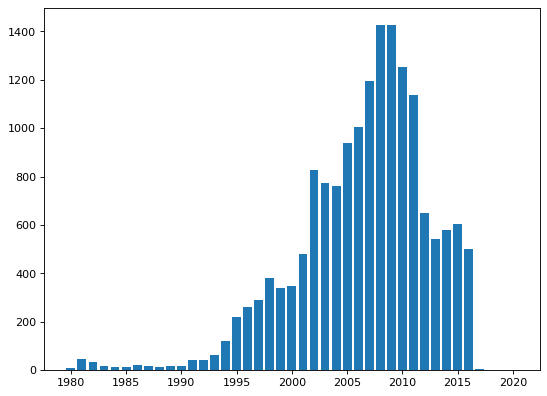

In [16]:
total = pd.read_sql("SELECT ano_lancamento,  COUNT(id) as jogos_lancados FROM game GROUP BY ano_lancamento ORDER BY ano_lancamento", db_connection)
total = total.drop(0)
figure(figsize=(8, 6), dpi=80)
plt.bar(total.ano_lancamento, total.jogos_lancados)

#### A soma de jogos vendidos a decorrer dos anos

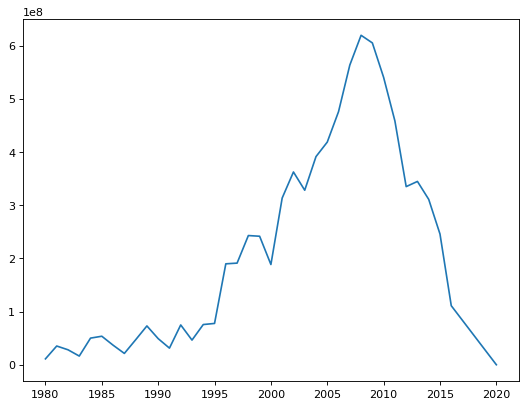

In [17]:
media_genero_ano = pd.read_sql("SELECT ano_lancamento, SUM(vg.quantidade) as quantidade FROM game g INNER JOIN vendas_global vg ON vg.game = g.id GROUP BY ano_lancamento ORDER BY ano_lancamento;", db_connection)
media_genero_ano = media_genero_ano[media_genero_ano['ano_lancamento'] != 0]
figure(figsize=(8, 6), dpi=80)
plt.plot(media_genero_ano['ano_lancamento'], media_genero_ano['quantidade'])